## SVMs (Support Vector Machines)
A powerful algorithm that is capable of linear/ Non-linear classfication, regression and even outlier detection.

Well suited for complex small/medium sized datasets

# __SVM Classification__

### Linear SVMs
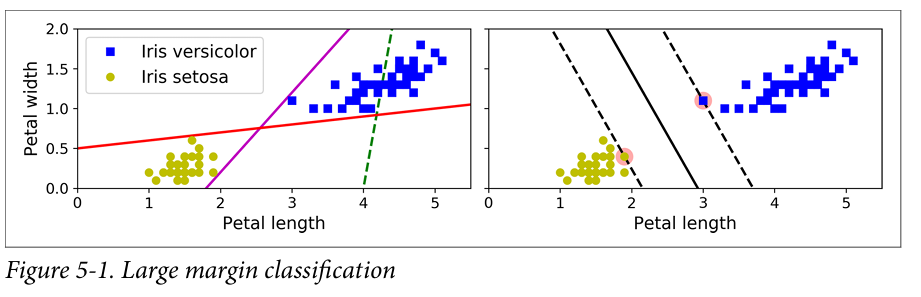

The left side: shows 3 linear classifiers, one line does not even separate classes, while other two fits perfectly, but they are too close to training data that they might fail when faced new data

The right side: shows SVM which draws a street (bold line is our descision boundary). This descision boundary tries to be farthest away from any training instance - 

_Basically, The SVM classifier fit the widest street possible (represented by dash lines) and keep the center as decision boundary. This is also called __Large Margin Classification___

Note -   
The decision boundary will not be affected by adding new instances off the street, because it is only determined by instances at the edge of the street (called _support vectors_) 

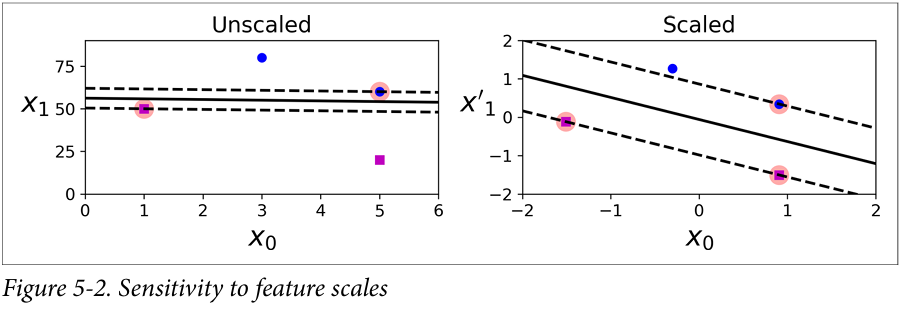

The model is sensitive to feature scales 

#### Hard-Margin SVM
Perfect form of SVM, where we impose that no instance be on the street i.e the street classifies the instances perfectly.

But this only good when instances are perfectly separable, And fails when there are outliers or data is not perfectly separable
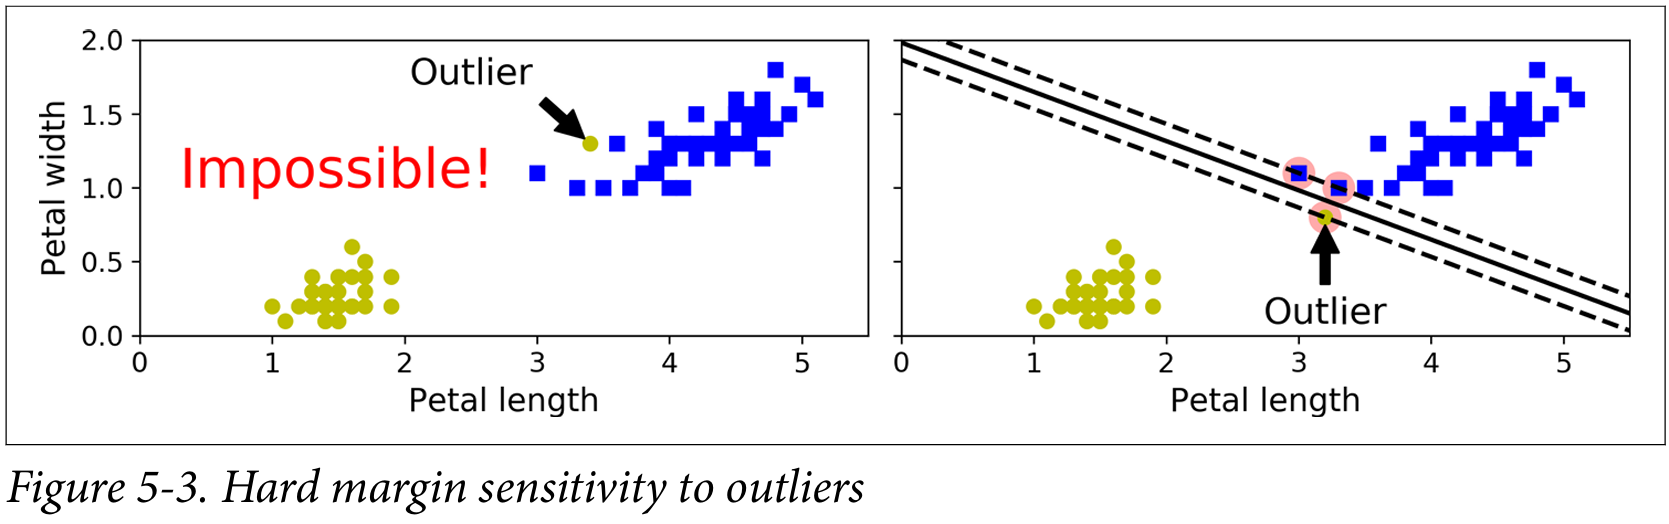

#### Soft-margin SVM
The ides is to have good balance between keeping the street as big as possible and limiting _margin violation_ (i.e instances that end up being in the street or other side)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
## We will classify 'virginica or not' for linear classification
x_iris = iris_data.drop('species',axis=1)
y_iris = (iris_data['species']=='virginica').astype(int)

In [4]:
svm_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('linearsvm_clf',LinearSVC(C=1,loss='hinge',max_iter=1000))  
])

svm_pipe.fit(x_iris,y_iris)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearsvm_clf', LinearSVC(C=1, loss='hinge'))])

In [5]:
# Predict any two instances 
svm_pipe.predict([[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

c:\Users\Arun\Documents\Documents\Machine_Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 1])

Hyperparameter 'C' is responsible for margin violations   -> Called `Slack` parameter  
C=High --> Low margin violations (Hard-margin svm)  (Risk of overfitting)  
C=Low --> High margin violations (Soft-margin svm)  (Risk of underfitting)

C is also used to regularise model if it is overfitting

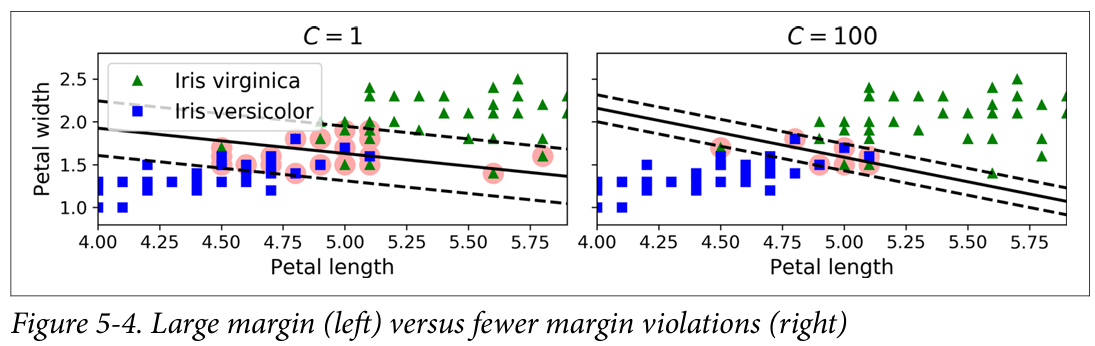

Unlike Logistic Regression classifiers, SVM classifiers do not out
put probabilities for each class.

In [ ]:
### Three ways of using SVM classifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#2
svc_clf = SVC(kernel='linear',C=1)

#3
m = len(x_iris)  
C = 1
alpha = 1/(m*C)   #Regularization strength (how much to penalize large weights), it acts as 'C' when given this value
sgd_clf = SGDClassifier(loss='hinge',alpha=alpha,max_iter=100)

#### When to use which?
- LinearSVC
    - Linear classification only
    - No other kernels can be used 
    - Fast

- SVC 
    - More flexible if you want to test other svms
    - Slow

- SGDClassifier
    - Slower convergence and lower accuracy
    - Better choice for online training if data is huge or out-of-core data

#### Non-Linear SVM classification
Sometimes the data is far from linearly separable  
So the idea is to add mode features like $x_2=(x_1)^2$ as in _polynomial regression_ . LinearSVC Classifier can create a straight line in hyperplane which will be a non-linear curve in plane of original features hyperplane

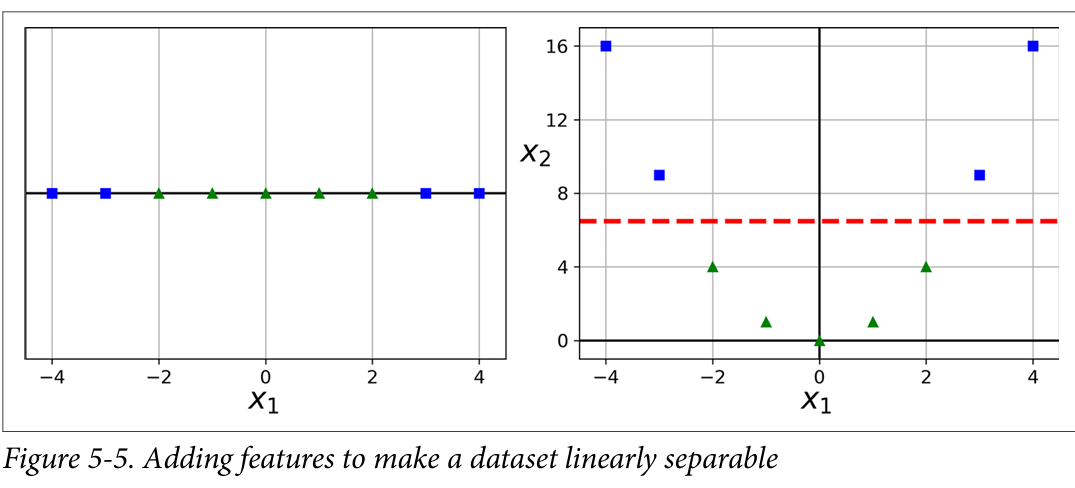

In [7]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
# Getting make_moons dataset which is used for learning binary classification

In [8]:
moon_x,moon_y = datasets.make_moons(n_samples=100,noise=0.15,random_state=42)

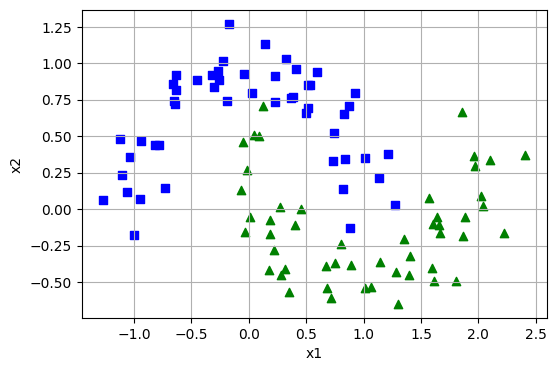

In [9]:
# Data points distribution 
plt.figure(figsize=(6,4))
plt.scatter(moon_x[:,0][moon_y==0],moon_x[:,1][moon_y==0],c='b',marker='s')
plt.scatter(moon_x[:,0][moon_y==1],moon_x[:,1][moon_y==1],c='g',marker='^')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

Clearly this is not a linearly separable data

In [10]:
# How Non-linear pipeline looks

poly_svm_pipe = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('poly_svm',LinearSVC(loss='hinge',C=1,max_iter=1000))
    ])
poly_svm_pipe.fit(moon_x,moon_y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('poly_svm', LinearSVC(C=1, loss='hinge'))])

_This model is Linear SVM classifier using polynomial features_

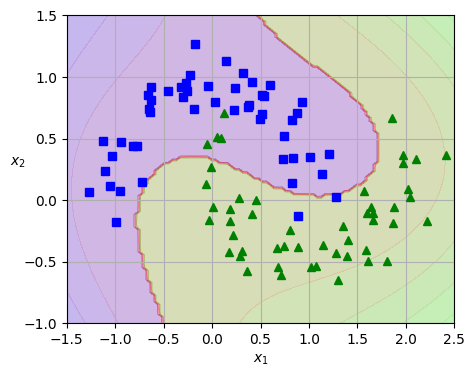

In [11]:
## Plotting the resulting model (Dont mind the code)
plt.figure(figsize=(5,4))
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm_pipe, [-1.5, 2.5, -1, 1.5])
plot_dataset(moon_x, moon_y, [-1.5, 2.5, -1, 1.5])


#### _Polynomial Kernel_
Using PolynomialFeatures is simple and works on almost every ML algorith, but it add a lot of features which makes the algo slow.   
SVM has an option of `kernel = 'poly'` to solve this! as this ___Kernel trick___ does not add any feature it is not bound to be as slow as simple method 

In [ ]:
# To apply kernel trick use - SVC
poly_kernel_svm_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('poly_kernel_svc',SVC(kernel='poly',degree=3,coef0=1,C=5))
])


poly_kernel_svm_pipe.fit(moon_x,moon_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_kernel_svc', SVC(C=5, coef0=1, kernel='poly'))])

The coef0 determines how much this model will be influenced by higher degree terms vs lower degree terms  
- coef0 high --> lower degree terms will have more influence and model is simplistic
- coef0 low (close to zero) --> higher degree terms will have more influence and model is complex

IF the degree is slightly more or less we can use coef0 to regulate it bit more precisely 

Text(0, 0.5, '')

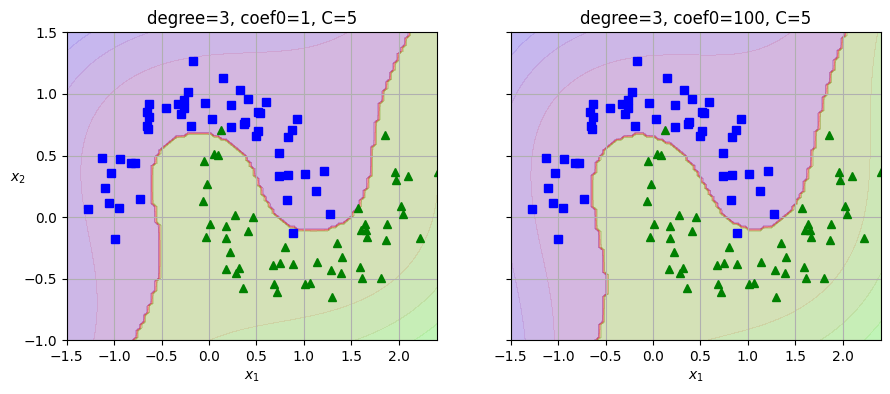

In [13]:
# Extra code
from sklearn.pipeline import make_pipeline
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(moon_x, moon_y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_pipe, [-1.5, 2.45, -1, 1.5])
plot_dataset(moon_x, moon_y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(moon_x, moon_y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=100, C=5")
plt.ylabel("")


### Similarity Features
Features that we add to the dataset using similarity function to tackle non-linear problems.  
Similarity function is a measures how much each instance resembles a particular landmark

there are many similarity functions in SVM, just under the name of 'kernel'. 

Gausian Radial Bias function (RBF):  
$$
\phi_\gamma(x,l) = e^{-\gamma||x-l||^2}
$$

where:
- $x$ is dataset
- $\gamma$ is the 'spread' of similarity function 
    - high $\gamma$ -> narrow curve (less spread) -> risk of overfitting
    - low $\gamma$ -> wide curve (more spread) -> risk of underfitting
- $l$ -> Landmark

RBF is a bell shaped function that ranges from 0 (at very far from landmark) and 1 (at the landmark)

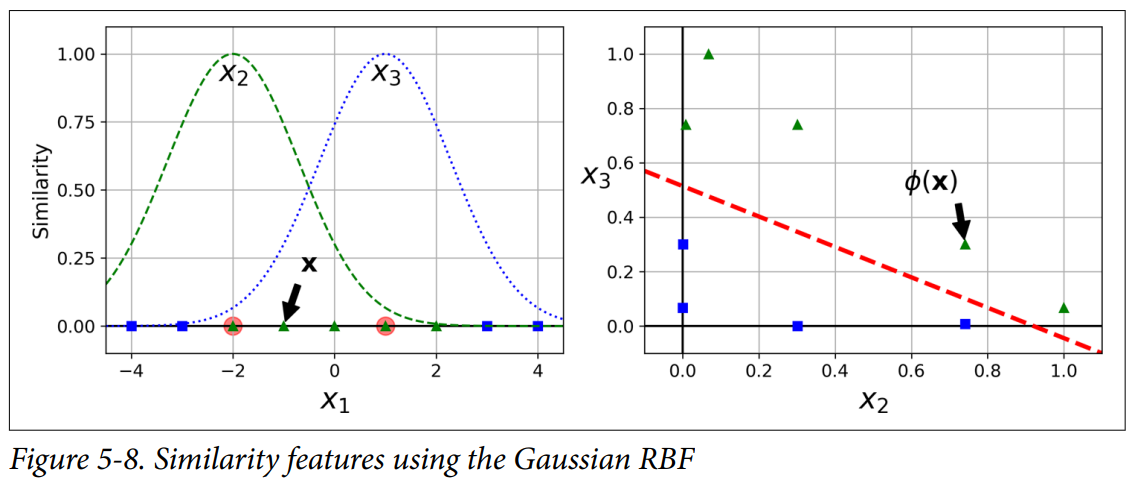

The left plot:  
is the plot of similarity function (bell shaped, ranging from 0-1). The landmarks are -2,1 and $\gamma=0.3$

The right plot:  
We dropped the x1 feature and added x2,x3 features. The data is now linearly separable!!  
Ex: take any instance from x1 (let x=-1 as shown). x1 is 1 unit away from -2 and 2 unit from 1, corresponding $x2=e^{-0.3*1}=0.74$ and $x3=e^{-0.3*4}=0.30$

How to select landmarks?  
The simplest approch is to create landmark for each and every instance in dataset. Doing that creates
many dimensions and thus increases the chances that the transformed training set
will be linearly separable

The problem is that dataset of mxn dimension transformed into mxm, which can be very large number of features to compute!

In [22]:
## Showing Gausion RBF as kernel

rbf_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('rbf_clf',SVC(kernel='rbf',gamma=5,C=100,))
])

rbf_pipeline.fit(moon_x,moon_y)

Pipeline(steps=[('scaler', StandardScaler()), ('rbf_clf', SVC(C=100, gamma=5))])

Plot of different hyperparameters

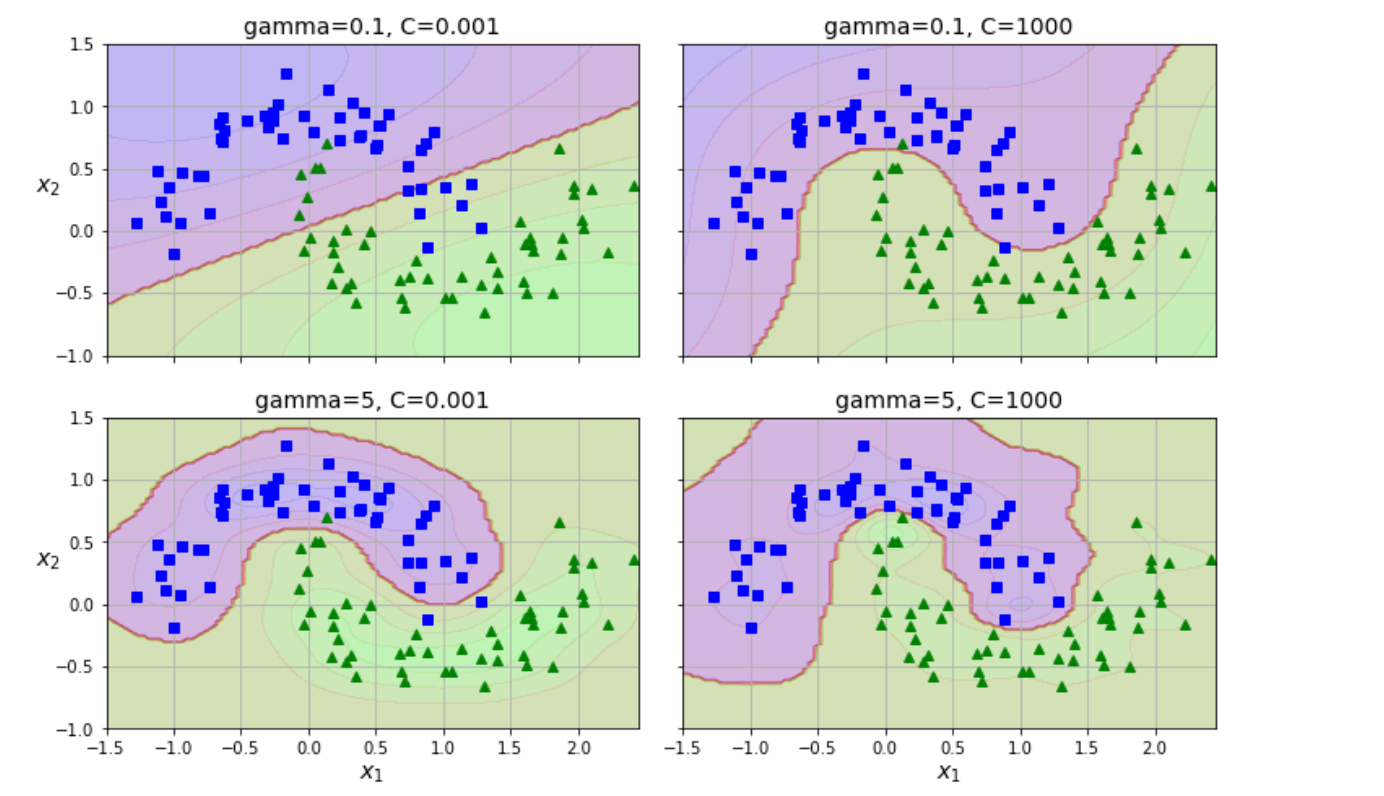

### __How to choose best kernel?__
- Rule of thumb is to start with LinearSVC (because its much faster than SVC(kernel=linear)) especially for large dataset with large nummber of features.  
- For small dataset use SVC(kernel=rbf), works well in most cases

### __Computational Complexity__
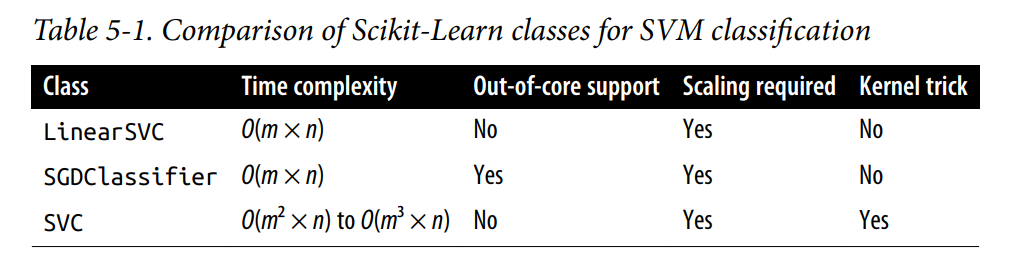

_`LinearSVC`_ and _`SGDClassifier`_ are good for large datasets and  

_`SVC`_ algorithm is perfect for complex small or medium-sized training sets. It scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features).

# __SVM Regression__

Here, instead of trying to fit largest possible street between classes, We try to fit as many instances as possible _on_ the street  

The margin violation are now those instances that go out of the street. We use $\epsilon$ to control the width of street  

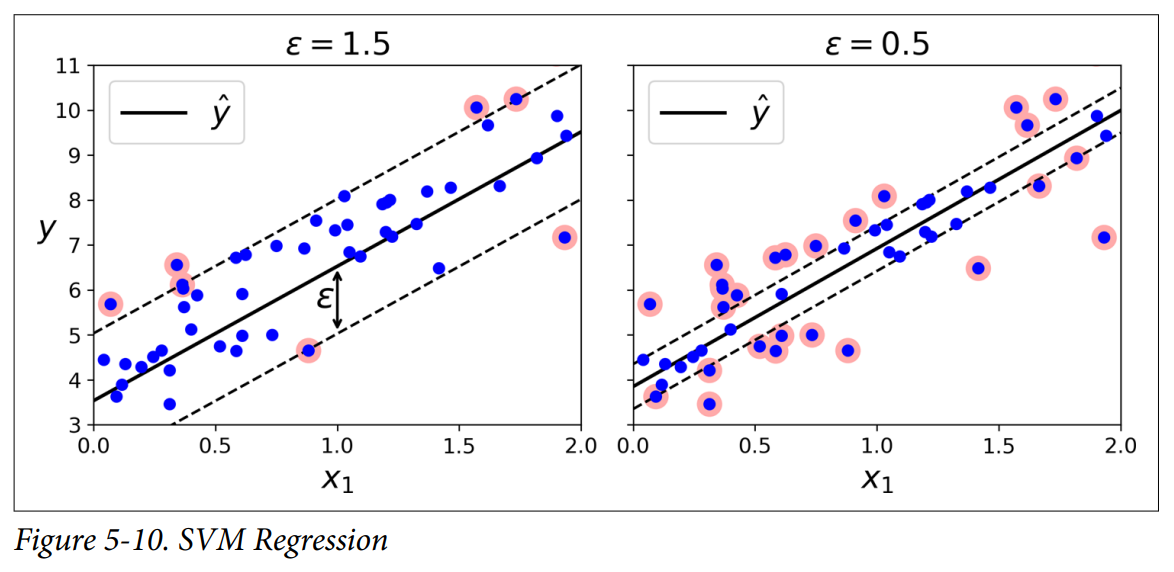

Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be $ϵ$-insensitive.

In [26]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)


svm_reg = make_pipeline(StandardScaler(),
LinearSVR(epsilon=0.5, dual='auto', random_state=42))  ## Dual = True/False/Auto
svm_reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

There are two types of optimization algorithms - Dual or Primal  
- In Primal type problem we directly optimize model parameters $\text{w(weights) and b(bias)}$.
    - Use when number of features < number of instances

- In Dual type problem we reformulate the problem using lagrange multipliers - idgaf any further
    - Use when number of features >= number of instances

- Using dual='auto' will select the algorithm by itself though

### _Non-linear SVM Regression_

In [ ]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

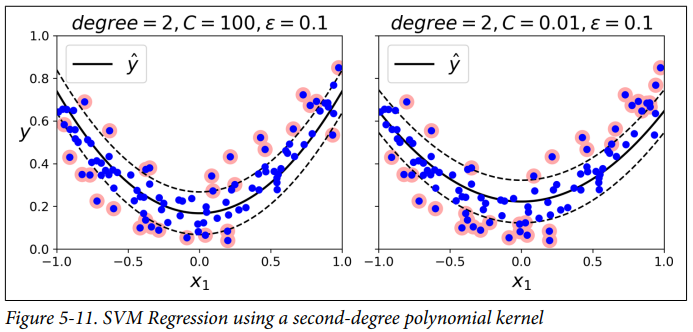

Again, Similar to SVM Classification  
- LinearSVR is scales linearly with the size of training data and 
- SVR is gets slower with the size of training data

# After this section, The book says
"If you are just getting started with Machine
Learning, you can safely skip it and go straight to the exercises at the end of this chap‐
ter, and come back later when you want to get a deeper understanding of SVMs."

So i will come back later when i there will be need to study svm deeply!!